#Numpy Cheatsheet

1998.0
1.0
255.0
255


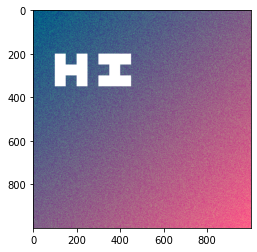

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

xsize = 1000
ysize = 1000
# array_1 = np.zeros((3,3,3),dtype='int32')

red = np.fromfunction(lambda x,y: x+y, (ysize,xsize))
red -= red.min(); print(red.max())
red /= red.max(); print(red.max())
red *= 255; print(red.max())
red = red.astype(int); print(red.max())

green = np.random.randint(10,180,size=(ysize,xsize))

blue = np.ones(shape=green.shape) *135
blue = blue.astype(int)

hi = np.dstack((red,green,blue))

ybuffer = int(ysize*.2)
xbuffer = int(xsize*.1) 
xwidth = int(xsize*.1) 

mask = red.copy().astype(bool)*0
h = np.ones((3,3))
h[[0,-1],1::2] = 0
i = h.T
space = np.zeros((3,1))
h = np.hstack((h,space,i))
n = 50
H = np.kron(h, np.ones((n,n)))
mask[ybuffer:ybuffer+H.shape[0],xbuffer:xbuffer+H.shape[1]] = H
mask = mask.astype('bool')
hi[mask] = 255


plt.imshow(hi)


# Python Lists



In [ ]:
# Python typically allows us to perform simple mathematical operations quickly and easily

a = 102
b = 48
c = a + b

print(c)

150


In [ ]:
# But if we try and use a list of numbers, python gets mad!

a = [1,2,3,4,5]
b = 48
c = a + b

print(c)

TypeError: ignored

In [ ]:
# if we want to do this calculation, we need to do it in a loop

a = [1,2,3,4,5]
b = 48
c = []

for value in a:
  c.append(value+b)

print(c)

[49, 50, 51, 52, 53]


In [ ]:
# this is because the plus sign is actually used to concatenate lists in python

a = [1,2,3,5,6]
b = [2,3,4,3,4]
c = a + b

print(c)

[1, 2, 3, 5, 6, 2, 3, 4, 3, 4]


In [ ]:
# lists in python can store strings, floats, int, objects etc..
# they may even store other lists! 
# given the flexability of lists in python, this syntax is sensible 

a = [1,'cat',2.8,'hey everyone']
b = [a,3,4,3,4]
c = a + b

print(c)

[1, 'cat', 2.8, 'hey everyone', [1, 'cat', 2.8, 'hey everyone'], 3, 4, 3, 4]


In [ ]:
# if we want to add the contents of two lists:
# the logic of the loop gets worse

a = [1,2,3,5,6]
b = [2,3,4,3,4]
c = []

for i in range(len(a)):
  c.append(a[i]+b[i])

print(c)

[3, 5, 7, 8, 10]


In [ ]:
# if we were to have a list of lists:
# these simple operation can get messy quick!

a = [1,2,3,4,5]
b = [a,a,a,a,a]
c = []

for i in range(len(b)):
  d = []
  for j in range(len(b[i])):
    d.append(b[i][j]+a[j])
  c.append(d)

print(c)

[[2, 4, 6, 8, 10], [2, 4, 6, 8, 10], [2, 4, 6, 8, 10], [2, 4, 6, 8, 10], [2, 4, 6, 8, 10]]


# Introduction to Numpy

In [ ]:
# thankfully we have numpy!
import numpy as np

In [ ]:
# we can convert our lists to numpy arrays easily
# and then we can perform mathematical oeprations on them 

a = [1,2,3,4,5]
b = 48

arr = np.array(a)
c = arr + b

print(c)

[49 50 51 52 53]


In [ ]:
# we can easily add mltiple arrays 

a = np.array([1,2,3,5,6])
b = np.array([2,3,4,3,4])

c = a+b

print(c)

[ 3  5  7  8 10]


In [ ]:
# lets replicate the functionality of the nasty nested 
# loop list operation operation from above using numpy!

a = np.array([1,2,3,4,5])
b = np.vstack((a,a,a,a,a)) # more on this later!

c = a + b

print(c)

[[ 2  4  6  8 10]
 [ 2  4  6  8 10]
 [ 2  4  6  8 10]
 [ 2  4  6  8 10]
 [ 2  4  6  8 10]]


In [ ]:
# as a matter of fact, many basic mathematical operations are avilable to us

a = np.array([1,2,3,5,6])
b = np.array([2,3,4,3,4])
c = 128

print( a - b ) # difference
print( a * b ) # multiplication
print( a ** b ) # to the exponent of!
print( a / b ) # division!
print( a % b ) # the 'remainder' of a/b
print( a @ b ) # the dot product!
print( (a + b) * c) # formulas!


[-1 -1 -1  2  2]
[ 2  6 12 15 24]
[   1    8   81  125 1296]
[0.5        0.66666667 0.75       1.66666667 1.5       ]
[1 2 3 2 2]
59
[ 384  640  896 1024 1280]


In [ ]:
# not only is the syntax nicer than lists
# generally numpy operations are faster
# the speed difference is greater with larger and larger arrays 

arr = np.random.rand(1000) # make this number bigger for a greater time difference!
a = arr.tolist()

def loop_add(a):
  for i in range(len(a)):
    a[i] += 0.1

def numpy_add(arr):
  arr+=0.1

%timeit(loop_add(a))
%timeit(numpy_add(arr))

10000 loops, best of 5: 119 µs per loop
The slowest run took 15.84 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 5: 2.26 µs per loop


# The Limitations of Numpy Arrays

> Sometimes lists are best



In [ ]:
# don't forget to import numpy!
import numpy as np

In [ ]:
# python lists are still awesome
# they can easily handle objects of various

a = [1,'cat',2.8,'hey everyone']
print(a[0])
print(type(a[0]))
print(a[1])
print(type(a[1]))

1
<class 'int'>
cat
<class 'str'>


In [ ]:
# numpy on the otherhand REQUIRES that ALL
# an arrays contents have the same type!

a = [1,'cat',2.8,'hey everyone']
a = np.array(a)
print(a[0])
print(type(a[0]))
print(a[1])
print(type(a[1]))

1
<class 'numpy.str_'>
cat
<class 'numpy.str_'>


In [ ]:
# arrays MUST be atleast rectangular in all dimensions 
# all entries of a given dimension require the same number of elements
# lets try and add some lists of various lengths to an array

a = [[1,2,3,5],
     [2,3,4,5,6],
     [2,3,6,4]]

arr = np.array(a)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  if __name__ == '__main__':


In [ ]:
# this requirement is a definition of arrays
# really its what makes them great! 
# the computer can index ahead reliably because all elements are the same size
# but sometimes list are best!

# Building Numpy Arrays 

## Arrays from Lists

In [ ]:
# we have seen how we can make arrays from lists

a = [1,2,3,4,5]
arr =np.array(a)
print(arr)

[1 2 3 4 5]


In [ ]:
# as a short hand of this, we can do it in one line

arr =np.array([1,2,3,4,5])
print(arr)

[1 2 3 4 5]


In [ ]:
# we can also make multidimensional arrays in this same way 

a = [[1,2,3,4,5],
     [2,3,4,5,6],
     [2,3,6,4,5]]

arr = np.array(a)
print(arr)

[[1 2 3 4 5]
 [2 3 4 5 6]
 [2 3 6 4 5]]


In [ ]:
# of course, we can make arrays any way we can generate lists

a = []
for i in range(10):
  a.append(i)

arr = np.array(a)
print(arr)

[0 1 2 3 4 5 6 7 8 9]


## Generated Arrays

### Empty Arrays

In [ ]:
# numpy has several in built ways to generate arrays

print(np.zeros(10))
print(np.ones(10))
print(np.empty(10))



[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
# generally, when we build an array this way, 
# we can specify (shape, dtype)

arr = np.zeros(10,dtype='int')
print(arr)
print('--------------')

arr = np.zeros(shape = (5,5),dtype='int')
print(arr)
print('--------------')

arr = np.zeros(shape = (3,3,3),dtype='int')
print(arr)
print('--------------')

arr = np.ones(10,dtype='int')
print(arr)
print('--------------')

arr = np.ones(shape = (5,5),dtype='int')
print(arr)
print('--------------')

arr = np.ones(shape = (3,3,3),dtype='int')
print(arr)

[0 0 0 0 0 0 0 0 0 0]
--------------
[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]
--------------
[[[0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]]]
--------------
[1 1 1 1 1 1 1 1 1 1]
--------------
[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]
--------------
[[[1 1 1]
  [1 1 1]
  [1 1 1]]

 [[1 1 1]
  [1 1 1]
  [1 1 1]]

 [[1 1 1]
  [1 1 1]
  [1 1 1]]]


In [ ]:
# 'empty' is a uniquely fast array that will actually use whatevers in the memory
# careful! they are not simply zeros! 

arr = np.empty(5, dtype='int')
print(arr)

[0 0 0 0 0]


###random arrays

In [ ]:
# numpy as many different functions for generating randomized data of various types

arr = np.random.rand(5)
print(arr)

arr = np.random.randint(low=0,high=255,size=5,dtype=np.int32)
print(arr)

arr = np.random.normal(loc = .5, scale =.2, size = 5)
print(arr)

[0.20006765 0.96128438 0.46063853 0.300528   0.38641694]
[ 52 128  43  26  82]
[0.58158895 0.49661062 0.1851645  0.51874068 0.29416314]


In [ ]:
# and ofcorse we can set the dimensions of these arrays as well

arr = np.random.rand(3,3,3) # here the size is the only argument!
print(arr)
print('--------------')

arr = np.random.randint(low=0,high=255,size=(3,3,3),dtype=np.int32)
print(arr)
print('--------------')

arr = np.random.normal(loc = .5, scale =.2, size = (3,3,3))
print(arr)


[[[0.6732163  0.19987764 0.54773886]
  [0.18693208 0.25616379 0.55895495]
  [0.28904292 0.68170752 0.80132916]]

 [[0.85504804 0.12213351 0.80413995]
  [0.08663742 0.32674894 0.17728632]
  [0.20000013 0.18318449 0.7830376 ]]

 [[0.62768464 0.51917342 0.51330742]
  [0.60515875 0.48141048 0.85038238]
  [0.54671886 0.4163889  0.04765475]]]
--------------
[[[249  76 242]
  [135 147  19]
  [248  64  37]]

 [[ 37 215  36]
  [ 12  98 196]
  [188 211   8]]

 [[120   8 230]
  [141  63 173]
  [ 99 226  95]]]
--------------
[[[ 0.63340225  0.68422418  0.79893061]
  [ 0.50702083  0.53111395  0.43315897]
  [ 0.56675492  0.49009143  0.27165151]]

 [[ 0.37436779  0.80529429  0.55842268]
  [ 0.5230351   0.5467659   0.59762026]
  [ 0.59348681  0.46357331  0.23601291]]

 [[ 0.2964833  -0.05752667  0.71606814]
  [ 0.45143181  0.02803626  0.43624916]
  [ 0.44117806  0.59221661  0.43618502]]]


###Continuous Arrays

In [ ]:
# funny named 'fromfunction' function is very powerful
# it allows us to use the indicies of a multidimensional array
# as the basis for a function

arr = np.fromfunction(lambda x: x, (5,),dtype=int) #not so impressed?
print(arr)
print('--------------')

arr = np.fromfunction(lambda x,y: x+y, (10,10)) # ooo purdy!
print(arr)
print('--------------')

arr = np.fromfunction(lambda x,y,z: x*100+y*10+z, (3,5,6)) #3d functions as well
print(arr)

[0 1 2 3 4]
--------------
[[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9.]
 [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
 [ 2.  3.  4.  5.  6.  7.  8.  9. 10. 11.]
 [ 3.  4.  5.  6.  7.  8.  9. 10. 11. 12.]
 [ 4.  5.  6.  7.  8.  9. 10. 11. 12. 13.]
 [ 5.  6.  7.  8.  9. 10. 11. 12. 13. 14.]
 [ 6.  7.  8.  9. 10. 11. 12. 13. 14. 15.]
 [ 7.  8.  9. 10. 11. 12. 13. 14. 15. 16.]
 [ 8.  9. 10. 11. 12. 13. 14. 15. 16. 17.]
 [ 9. 10. 11. 12. 13. 14. 15. 16. 17. 18.]]
--------------
[[[  0.   1.   2.   3.   4.   5.]
  [ 10.  11.  12.  13.  14.  15.]
  [ 20.  21.  22.  23.  24.  25.]
  [ 30.  31.  32.  33.  34.  35.]
  [ 40.  41.  42.  43.  44.  45.]]

 [[100. 101. 102. 103. 104. 105.]
  [110. 111. 112. 113. 114. 115.]
  [120. 121. 122. 123. 124. 125.]
  [130. 131. 132. 133. 134. 135.]
  [140. 141. 142. 143. 144. 145.]]

 [[200. 201. 202. 203. 204. 205.]
  [210. 211. 212. 213. 214. 215.]
  [220. 221. 222. 223. 224. 225.]
  [230. 231. 232. 233. 234. 235.]
  [240. 241. 242. 243. 244. 245.]]]


In [ ]:
# arange is a useful function that generates an array of a given range
# its syntax is a bit different. (start, stop, step, dtype)
# this can only be 1d

arr=np.arange(10)
print(arr)
print('--------------')
arr = np.arange(start = 0,stop = 5, step =.8,dtype = float)
print(arr)
print('--------------')
arr = np.arange(-2,5,.8,int)
print(arr)

[0 1 2 3 4 5 6 7 8 9]
--------------
[0.  0.8 1.6 2.4 3.2 4.  4.8]
--------------
[-2 -1  0  1  2  3  4  5  6]


In [ ]:
# having arrays of continuous values can be very helpful!
# the linspace function retuns an array of a given length 
# interpolated between and start and a stop

arr = np.linspace(start=1 ,stop=2 ,num=3)
print(arr)
print('--------------')
arr = np.linspace(0 ,10 ,5) #shorthand
print(arr)
print('--------------')
ar1 = np.arange(0,20)
ar2 = np.arange(20,40)
arr = np.linspace(ar1 ,ar2 ,5, axis=1) #you can feed in arrays!
print(arr)

[1.  1.5 2. ]
--------------
[ 0.   2.5  5.   7.5 10. ]
--------------
[[ 0.  5. 10. 15. 20.]
 [ 1.  6. 11. 16. 21.]
 [ 2.  7. 12. 17. 22.]
 [ 3.  8. 13. 18. 23.]
 [ 4.  9. 14. 19. 24.]
 [ 5. 10. 15. 20. 25.]
 [ 6. 11. 16. 21. 26.]
 [ 7. 12. 17. 22. 27.]
 [ 8. 13. 18. 23. 28.]
 [ 9. 14. 19. 24. 29.]
 [10. 15. 20. 25. 30.]
 [11. 16. 21. 26. 31.]
 [12. 17. 22. 27. 32.]
 [13. 18. 23. 28. 33.]
 [14. 19. 24. 29. 34.]
 [15. 20. 25. 30. 35.]
 [16. 21. 26. 31. 36.]
 [17. 22. 27. 32. 37.]
 [18. 23. 28. 33. 38.]
 [19. 24. 29. 34. 39.]]


# Reshaping Numpy Arrays

In [ ]:
# Don't forget to import numpy!
import numpy as np

In [ ]:
# we can 'nest' our data into a deeper and deeper array

arr = np.array([1,2,3,4,5])
print(arr)
arr = np.expand_dims(arr, axis=0)
print(arr)
arr = np.expand_dims(arr, axis=0)
print(arr)

[1 2 3 4 5]
[[1 2 3 4 5]]
[[[1 2 3 4 5]]]


In [ ]:
# we can always check the shape and dimensions of our arrays!

arr = np.array([1,2,3,4,5])
print(arr, arr.shape)
arr = np.expand_dims(arr, axis=0)
print(arr, arr.shape)
arr = np.expand_dims(arr, axis=0)
print(arr, arr.shape)

[1 2 3 4 5] (5,)
[[1 2 3 4 5]] (1, 5)
[[[1 2 3 4 5]]] (1, 1, 5)


In [ ]:
# as long as we understand that our arrays must have consistent dimensions 
# we can build arrays in parts and join them in various ways

arr = np.array([1,2,3,4,5])
brr = np.array([6,7,8,9,10])


print(np.hstack((arr,brr))) # horizontal stack 
print()
print(np.vstack((arr,brr))) # vertical stacking 
print()
print(np.dstack((arr,brr)))# 'depth stacking 

[ 1  2  3  4  5  6  7  8  9 10]

[[ 1  2  3  4  5]
 [ 6  7  8  9 10]]

[[[ 1  6]
  [ 2  7]
  [ 3  8]
  [ 4  9]
  [ 5 10]]]


In [ ]:
# we can reshae arrays 

arr = np.arange(75)
arr = arr.reshape(3,5,5)
print(arr)

[[[ 0  1  2  3  4]
  [ 5  6  7  8  9]
  [10 11 12 13 14]
  [15 16 17 18 19]
  [20 21 22 23 24]]

 [[25 26 27 28 29]
  [30 31 32 33 34]
  [35 36 37 38 39]
  [40 41 42 43 44]
  [45 46 47 48 49]]

 [[50 51 52 53 54]
  [55 56 57 58 59]
  [60 61 62 63 64]
  [65 66 67 68 69]
  [70 71 72 73 74]]]


In [ ]:
# we can transpose arrays quickly 

a = np.array([1,2,3,4,5],
             )

print(a)
print()
print(a.T)

[1 2 3 4 5]

[1 2 3 4 5]


In [ ]:
# repeat is nifty as well!
a = np.array([[0,1],[1,0]])
a.repeat(2,axis=0).repeat(2,axis=1).astype(bool)

array([[False, False,  True,  True],
       [False, False,  True,  True],
       [ True,  True, False, False],
       [ True,  True, False, False]])

# Indexing Numpy Arrays

In [ ]:
# Don't forget to import numpy!
import numpy as np

In [ ]:
arr = np.arange(100)
lst = arr.tolist()
print(arr)
print(lst)
print(arr[25])
print(lst[25])

In [ ]:
arr = np.zeros(10)

arr[0] = 1

print(arr)

In [ ]:
arr = np.zeros(10)

arr[-1] = 1

print(arr)

In [ ]:
arr = np.zeros(10)

arr[:] = 1

print(arr)

In [ ]:
arr = np.zeros(10)

arr[1:4] = 1

print(arr)

In [ ]:
arr = np.zeros(10)

arr[:4] = 1

print(arr)

In [ ]:
arr = np.zeros(10)

arr[3:] = 1

print(arr)

In [ ]:
arr = np.zeros(10)

arr[::3] = 1

print(arr)

In [ ]:
arr = np.zeros(10)

arr[1:8:2] = 1

print(arr)

# Slicing Numpy Arrays

In [ ]:
# Don't forget to import numpy!
import numpy as np

In [ ]:
arr = np.arange(100)
lst = arr.tolist()
print(arr)
print(lst)
print(arr[27:88:5])
print(lst[27:88:5])

In [ ]:
arr = np.arange(1,21)
print(arr)
print(arr[0:10:3])
print(arr[::2])


Slicing Multidimentinal arrays

In [ ]:
arr = np.zeros((5,5))

arr[::2,::2]=1

print(arr)

print()
print('yielding..')
print(arr[::2,::2])

In [ ]:
arr = np.zeros((3,5,5))

arr[:,0,0]=1

print(arr)
print()
print('yielding..')
print(arr[:,0,0])

# Fancy Indexing: Where

In [ ]:
# Don't forget to import numpy!
import numpy as np

In [ ]:
arr = np.random.rand(3,3,3)
print(arr)
print()
print('arrar where values greater than 0.5...')
print(arr>.5)
print()
print('yielding..')
print(arr[arr>.5])

# Fancy indexing : Boolean

In [ ]:
# Don't forget to import numpy!
import numpy as np

In [ ]:
arr = np.zeros(4)
arr[[True,False,False,False]]=1
print(arr)

# Summerizing Arrays 


In [ ]:
arr = np.fromfunction(lambda x: x*x, (100,))
print(arr)
print()
print('converting to integers..')
print(arr.astype(int))

In [ ]:
arr = np.random.rand(100,100,100)
print(arr.shape)
print(arr.mean())
print(arr.max())
print(arr.min())
print(arr.std())
print(arr.ptp())

In [ ]:
arr = np.random.rand(12,5)
print(arr)
print()
print('standard deviations..')
print(arr.std(axis=0))

In [ ]:
arr = np.random.rand(12,5)
print(arr)
print()
print('Index of maximum value..')
print(np.argmax(arr,axis=0))
print()
print('yielding..')
print(arr[np.argmax(arr,axis=0), np.arange(5)])

In [ ]:
arr = np.random.rand(100,5,5)
print('maximum along axis 0...')
print(arr.max(axis=0))

In [ ]:
arr = np.random.rand(20,20)
arr = np.where(arr>.5,1,0)
print(arr)

# Displaying Numpy Arrays

In [ ]:
# Don't forget to import numpy!
import numpy as np

# now lets introduce matplotlib
import matplotlib.pyplot as plt

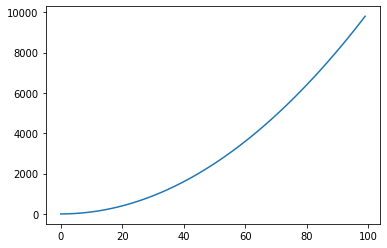

In [ ]:
arr = np.fromfunction(lambda x: x*x, (100,))
plt.plot(arr)

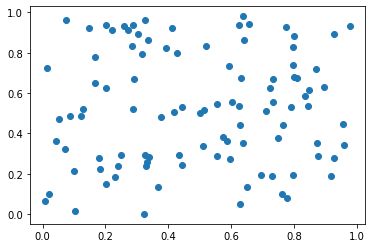

In [ ]:
arr1 = np.random.rand(100)
arr2 = np.random.rand(100)
plt.scatter(arr1,arr2)

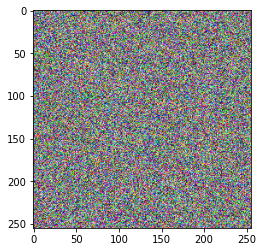

In [ ]:
arr = np.random.rand(255,255,3)
plt.imshow(arr)

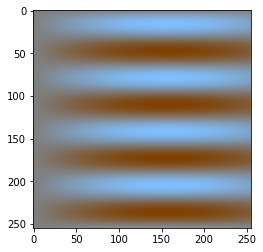

In [ ]:
arr = np.fromfunction(lambda x,y,z: np.sin(x*.1)*np.sin(y*.01)*z, (255,255,3))
arr-=arr.min()
arr/=arr.max()
plt.imshow(arr)

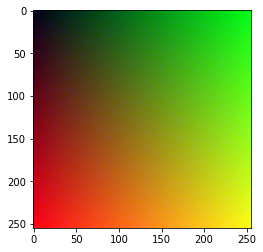

In [ ]:
R = np.fromfunction(lambda x,y: x, (255,255)).astype(int)
G = np.fromfunction(lambda x,y: y, (255,255)).astype(int)
B = np.zeros((255,255))
B = np.random.randint(0,50,(255,255))
arr = np.dstack((R,G,B))
plt.imshow(arr)

# Nifty Numpy Functions

In [ ]:
# Don't forget to import numpy!
import numpy as np

#were going to need matplotlib as well
import matplotlib.pyplot as plt

## Neural Networks!

-------input------------------
[[0.51506494 0.88767538 0.76691568 0.49050428 0.03381145]
 [0.65323613 0.14950414 0.28558611 0.42308635 0.72712349]
 [0.37585002 0.4837474  0.27720476 0.80376559 0.59143973]
 [0.85814108 0.37101121 0.36977768 0.77593218 0.04485549]]
-------dot product with-------
[[1.00000000e+00 2.67486556e-21 2.55735830e-40 1.00000000e+00]
 [2.01410928e-01 9.94965674e-01 2.50521799e-01 3.76442694e-03]
 [1.00000000e+00 1.65961659e-16 5.10189111e-30 1.00000000e+00]
 [1.37919771e-29 1.00000000e+00 1.00000000e+00 3.65952451e-20]
 [9.76661188e-32 1.00000000e+00 1.00000000e+00 7.47217215e-17]]
-------gives------------------
[[0.81165135 0.80337481 0.67845629 0.7833544 ]
 [0.72490724 0.78566012 0.76632266 0.71897543]
 [0.67928571 0.86721058 0.82000605 0.65810839]
 [0.78628027 0.76672872 0.71376271 0.77369874]]
-------dot product with-------
[[ 6.46476637]
 [-5.05026575]
 [-7.76244595]
 [ 5.10036187]]
-------gives------------------
[[0.47970228]
 [0.17322634]
 [0.04756878]
 [0.

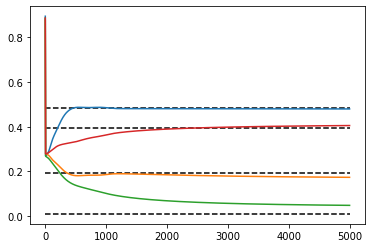

In [ ]:
import numpy as np

def sigmoid(x):
  return 1.0/(1+np.exp(-x))

def sigmoid_derivative(x):
  return x * (1.0 - x)

class NeuralNet:
  def __init__ (self, x,y):

    self.input = x
    self.weights1 = np.random.rand(self.input.shape[1],4)
    self.weights2 = np.random.rand(4,1)
    self.y = y
    self.output = np.zeros(self.y.shape)


  def feedforward(self):

    self.layer1 = sigmoid(np.dot(self.input,self.weights1))
    self.output = sigmoid(np.dot(self.layer1,self.weights2))

  def backprop(self):
    loss = self.y - self.output

    back2 = 2* loss * sigmoid_derivative(self.output)
    back1 = np.dot(back2, self.weights2.T)

    d_weights2 = np.dot(self.layer1.T, back2)
    d_weights1 = np.dot(self.input.T, back1) * sigmoid_derivative(self.weights1) 

    self.weights1 += d_weights1
    self.weights2 += d_weights2

  def train(self, epochs = 100, report = False):
    if report:
      progress = []
    for i in range(epochs):
      self.feedforward()
      self.backprop()
      if report:
        progress.append(self.output)
    print('-------input------------------')
    print(self.input)
    print('-------dot product with-------')
    print(self.weights1)
    print('-------gives------------------')
    print(self.layer1)
    print('-------dot product with-------')
    print(self.weights2)
    print('-------gives------------------')
    print(self.output)
    print('-------which is like----------')
    print(self.y)
    print('-----------------------------')
    if report:  
      return np.array(progress).T[0]

#how many records?
# records = 4
# features = 5

#try ints
X = np.random.randint(0,1,(4,5)) # records, features
y = np.random.randint(0,1,(4,1)) # records, category

#try floats
X = np.random.rand(4,5)
y = np.random.rand(4,1)

nn= NeuralNet(X,y).train(epochs = 5000,report=True)

import matplotlib.pyplot as plt
for i in nn:
  plt.plot(i)
plt.hlines(y,0,nn.shape[1],linestyles='dashed')
plt.show()

##Interpolation

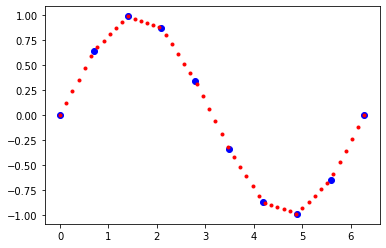

In [ ]:

x = np.linspace(0, 2*np.pi, 10)
y = np.sin(x)
xp = np.linspace(0, 2*np.pi, 50)
yp = np.interp(xp, x, y)

plt.plot(x,y,'bo')
plt.plot(xp,yp,'r.')
plt.show()

## polyfit

Coefficients [-1.42836956e-08  5.33872486e-06 -5.91008458e-04  2.38663231e-02
  7.17129605e-01 -2.03986013e+00]


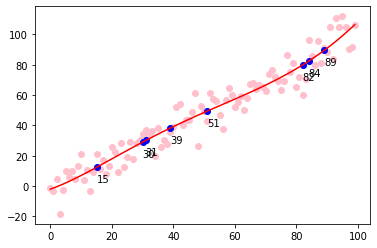

In [ ]:
a = np.arange(100)
# b = np.random.binomial(8,.8,100)
# b = np.random.rand(100)
b =np.random.normal(a,10,100)
fit = np.polyfit(a,b,5)
print(f'Coefficients {fit}')
plt.scatter(a,b,c='pink')

# 
poly = np.poly1d(fit)

new_x = np.linspace(a[0], a[-1])
new_y = poly(new_x)

plt.plot(new_x,new_y,'-',c='red')

ptsx = np.random.randint(0,100,8)
ptsy = np.polyval(fit,ptsx)
plt.scatter(ptsx,ptsy,c='blue')

for i, x in enumerate(ptsx):
    plt.annotate(x, (x, ptsy[i]),xytext=(x, ptsy[i]-10))

## Kron!

(2, 2)
(5, 5)
(1000, 1000)


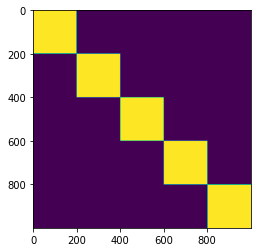

In [ ]:
a = np.array([[1, 0],
              [0, 1]])
print(a.shape)
a = np.eye(5)
print(a.shape)
n = 200
a = np.kron(a, np.ones((n,n)))
print(grid.shape)
plt.imshow(grid)

## MeshGrid

In [ ]:

grid_x, grid_y = np.mgrid[0:1:100j, 0:1:200j]

## Custom Functions

In [ ]:
# def func(x, y):
#     return x*(1-x)*np.cos(4*np.pi*x) * np.sin(4*np.pi*y**2)**2


points = np.random.rand(1000, 2)
values = func(points[:,0], points[:,1])

# Nump NaN

# Libraries that use Numpy

## Scipy 
https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.griddata.html

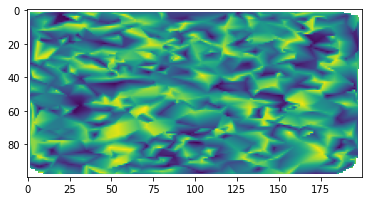

In [ ]:
import numpy as np

points = np.random.rand(1000, 2)
values = np.random.rand(1000)

grid_x, grid_y = np.mgrid[0:1:100j, 0:1:200j]

from scipy.interpolate import griddata
methods = ['linear', 'nearest', 'cubic']
grid_z0 = griddata(points, values, (grid_x, grid_y), method=methods[0])

import matplotlib.pyplot as plt

plt.imshow(grid_z0)

In [ ]:
import numpy as np
import scipy.misc

def scale_array(x, new_size):
    min_el = np.min(x)
    max_el = np.max(x)
    y = scipy.misc.imresize(x, new_size, mode='L', interp='nearest')
    y = y / 255 * (max_el - min_el) + min_el
    return y

x = np.array([[1, 1],
              [0, 1]])
n = 2
new_size = n * np.array(x.shape)
y = scale_array(x, new_size)
print(y)

AttributeError: ignored

## Tensorflow/Keras

Epoch 1/50
Epoch 2/50
Epoch 3/50
Epoch 4/50
Epoch 5/50
Epoch 6/50
Epoch 7/50
Epoch 8/50
Epoch 9/50
Epoch 10/50
Epoch 11/50
Epoch 12/50
Epoch 13/50
Epoch 14/50
Epoch 15/50
Epoch 16/50
Epoch 17/50
Epoch 18/50
Epoch 19/50
Epoch 20/50
Epoch 21/50
Epoch 22/50
Epoch 23/50
Epoch 24/50
Epoch 25/50
Epoch 26/50
Epoch 27/50
Epoch 28/50
Epoch 29/50
Epoch 30/50
Epoch 31/50
Epoch 32/50
Epoch 33/50
Epoch 34/50
Epoch 35/50
Epoch 36/50
Epoch 37/50
Epoch 38/50
Epoch 39/50
Epoch 40/50
Epoch 41/50
Epoch 42/50
Epoch 43/50
Epoch 44/50
Epoch 45/50
Epoch 46/50
Epoch 47/50
Epoch 48/50
Epoch 49/50
Epoch 50/50


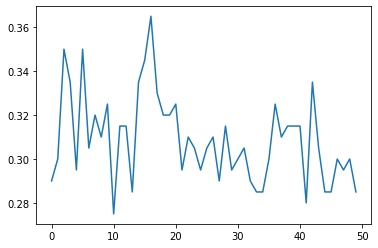

In [ ]:
# importing requirements
from keras.layers import Dense
from keras.models import Sequential

#https://www.analyticsvidhya.com/blog/2019/08/detailed-guide-7-loss-functions-machine-learning-python-code/

# alpha = 0.001 as given in the lr parameter in adam() optimizer

# build the model
model_alpha1 = Sequential()
model_alpha1.add(Dense(50, input_dim=2, activation='relu'))
model_alpha1.add(Dense(3, activation='softmax'))

# compile the model
# model_alpha1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_alpha1.compile(loss='mae', optimizer='adam', metrics=['accuracy'])

X = np.random.rand(200,2)
y = np.random.rand(200,3)

# fit the model
# dummy_Y is the one-hot encoded 
# history_alpha1 is used to score the validation and accuracy scores for plotting 
history_alpha1 = model_alpha1.fit(X, y, validation_data=(X, y), epochs=50, verbose=.1, batch_size=10)

import matplotlib.pyplot as plt
plt.plot(history_alpha1.history['accuracy'])

## Scikit-learn

## Aestheta!

## Pandas